<a href="https://colab.research.google.com/github/mrdbourke/pytorch-deep-learning/blob/main/extras/exercises/04_pytorch_custom_datasets_exercises.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 04. PyTorch Custom Datasets Exercises Template

Welcome to the 04. PyTorch Custom Datasets exercise template.

The best way to practice PyTorch code is to write more PyTorch code.

So read the original notebook and try to complete the exercises by writing code where it's required.

Feel free to reference the original resources whenever you need but should practice writing all of the code yourself.

## Resources

1. These exercises/solutions are based on [notebook 04 of the Learn PyTorch for Deep Learning course](https://www.learnpytorch.io/04_pytorch_custom_datasets/).
2. See a live [walkthrough of the solutions (errors and all) on YouTube](https://youtu.be/vsFMF9wqWx0).
3. See [other solutions on the course GitHub](https://github.com/mrdbourke/pytorch-deep-learning/tree/main/extras/solutions).

In [1]:
# Check for GPU
!nvidia-smi

Wed Feb 21 15:30:41 2024       
+-----------------------------------------------------------------------------------------+
| NVIDIA-SMI 551.23                 Driver Version: 551.23         CUDA Version: 12.4     |
|-----------------------------------------+------------------------+----------------------+
| GPU  Name                     TCC/WDDM  | Bus-Id          Disp.A | Volatile Uncorr. ECC |
| Fan  Temp   Perf          Pwr:Usage/Cap |           Memory-Usage | GPU-Util  Compute M. |
|                                         |                        |               MIG M. |
|=========================================+========================+======================|
|   0  NVIDIA GeForce 940MX         WDDM  |   00000000:01:00.0 Off |                  N/A |
| N/A    0C    P0             N/A /  200W |       0MiB /   2048MiB |      0%      Default |
|                                         |                        |                  N/A |
+-----------------------------------------+-----

In [2]:
# Import torch
import torch
from torch import nn

# Exercises require PyTorch > 1.10.0
print(torch.__version__)

# Setup device agnostic code
device = "cuda" if torch.cuda.is_available() else "cpu"
device

2.2.0+cu121


'cuda'

## 1. Our models are underperforming (not fitting the data well). What are 3 methods for preventing underfitting? Write them down and explain each with a sentence.

1. Add more layers or hidden units: By doing this, we can make our model more complex and will have more capability to learn complex patterns.
2. Less regularization: Regularization is used to prevent overfitting but if the regularizer parameter is chosen to be high, it can affect the model negatively in learning the underlying patterns.
3. Train for more epochs: If we allow to model to look at the data and try to learn the patterns for more epochs, this can also help with reducing underfitting.

## 2. Recreate the data loading functions we built in [sections 1, 2, 3 and 4 of notebook 04](https://www.learnpytorch.io/04_pytorch_custom_datasets/). You should have train and test `DataLoader`'s ready to use.

In [3]:
# 1. Get data
import requests
import zipfile
from pathlib import Path

data_path = Path("data")
food_data_path = data_path / "pizza_steak_sushi"

if food_data_path.is_dir():
    print(f"{food_data_path} already exists.")
else:
    print(f"Did not find {food_data_path}. Creating one...")
    food_data_path.mkdir(parents=True, exist_ok=True)

    with open(data_path / "pizza_steack_sushi.zip", "wb") as f:
        print(f"Downloading food data...")
        request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi.zip")
        f.write(request.content)

    with zipfile.ZipFile(data_path / "pizza_steack_sushi.zip", "r") as zipfile:
        print(f"Extracting data...")
        zipfile.extractall(food_data_path)

data\pizza_steak_sushi already exists.


In [4]:
# 2. Become one with the data
import os
def walk_through_dir(dir_path):
  """Walks through dir_path returning file counts of its contents."""
  for dirpath, dirnames, filenames in os.walk(dir_path):
    print(f"There are {len(dirnames)} directories and {len(filenames)} images in '{dirpath}'.")

In [5]:
walk_through_dir(dir_path=food_data_path)

There are 2 directories and 0 images in 'data\pizza_steak_sushi'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi\test'.
There are 0 directories and 25 images in 'data\pizza_steak_sushi\test\pizza'.
There are 0 directories and 19 images in 'data\pizza_steak_sushi\test\steak'.
There are 0 directories and 31 images in 'data\pizza_steak_sushi\test\sushi'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi\train'.
There are 0 directories and 78 images in 'data\pizza_steak_sushi\train\pizza'.
There are 0 directories and 75 images in 'data\pizza_steak_sushi\train\steak'.
There are 0 directories and 72 images in 'data\pizza_steak_sushi\train\sushi'.


In [6]:
# Setup train and testing paths
train_path = food_data_path / "train"
test_path = food_data_path / "test"

train_path, test_path

(WindowsPath('data/pizza_steak_sushi/train'),
 WindowsPath('data/pizza_steak_sushi/test'))

In [7]:
walk_through_dir(train_path)

There are 3 directories and 0 images in 'data\pizza_steak_sushi\train'.
There are 0 directories and 78 images in 'data\pizza_steak_sushi\train\pizza'.
There are 0 directories and 75 images in 'data\pizza_steak_sushi\train\steak'.
There are 0 directories and 72 images in 'data\pizza_steak_sushi\train\sushi'.


In [8]:
walk_through_dir(test_path)

There are 3 directories and 0 images in 'data\pizza_steak_sushi\test'.
There are 0 directories and 25 images in 'data\pizza_steak_sushi\test\pizza'.
There are 0 directories and 19 images in 'data\pizza_steak_sushi\test\steak'.
There are 0 directories and 31 images in 'data\pizza_steak_sushi\test\sushi'.


Image path: data\pizza_steak_sushi\test\sushi\2394442.jpg
Image class: sushi
Image height: 408
Image width: 512


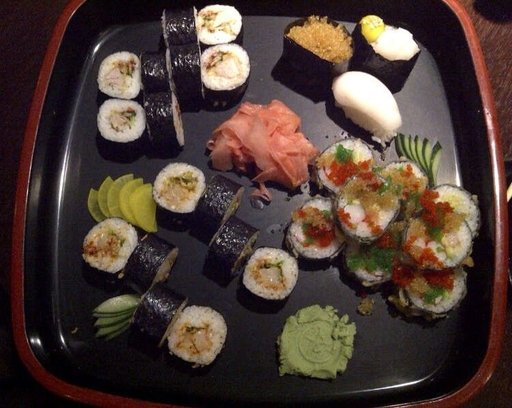

In [9]:
# Visualize an image
import random
from PIL import Image

random.seed(42)

image_path_list = list(food_data_path.glob("*/*/*.jpg"))
random_image_path = random.choice(image_path_list)

class_name = random_image_path.parent.name
image = Image.open(random_image_path)

print(f"Image path: {random_image_path}")
print(f"Image class: {class_name}")
print(f"Image height: {image.height}")
print(f"Image width: {image.width}")
image

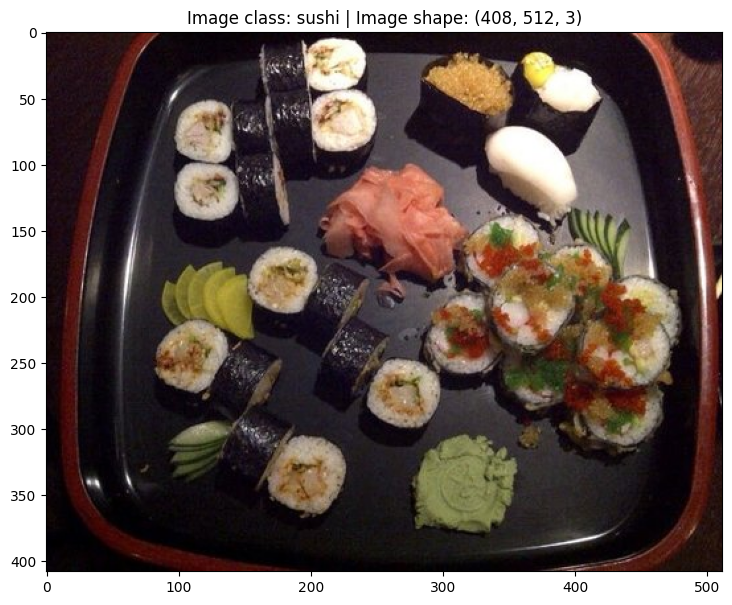

In [10]:
# Do the image visualization with matplotlib
import numpy as np
import matplotlib.pyplot as plt

image_as_array = np.asarray(image)

plt.figure(figsize=(10, 7))
plt.imshow(image_as_array)
plt.title(f"Image class: {class_name} | Image shape: {image_as_array.shape}")
plt.show()

We've got some images in our folders.

Now we need to make them compatible with PyTorch by:
1. Transform the data into tensors.
2. Turn the tensor data into a `torch.utils.data.Dataset` and later a `torch.utils.data.DataLoader`.

In [11]:
from torch.utils.data import DataLoader
from torchvision import datasets, transforms

In [12]:
# 3.1 Transforming data with torchvision.transforms
data_transform = transforms.Compose([
    transforms.Resize(size=(64, 64)),
    transforms.RandomHorizontalFlip(p=0.5),
    transforms.ToTensor()
])

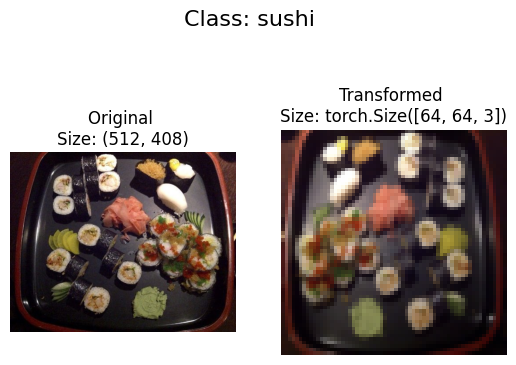

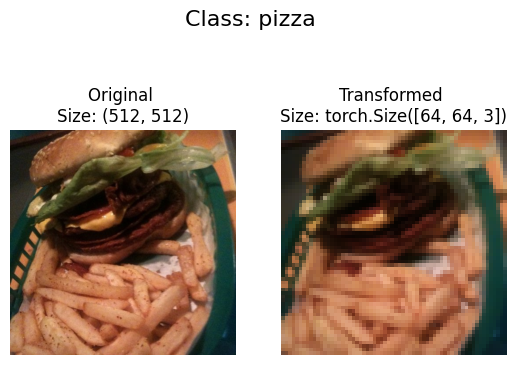

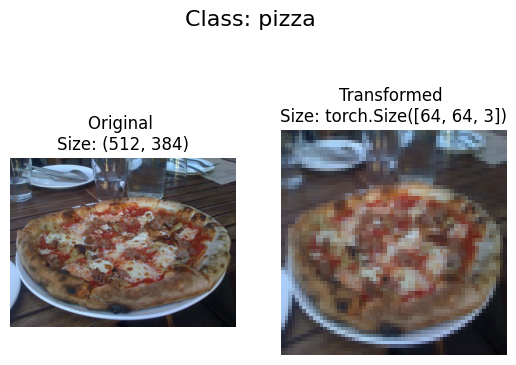

In [13]:
# Write a function to plot transformed images
def plot_transformed_images(image_paths, transform, n=3, seed=42):
    random.seed(seed)
    random_image_paths = random.sample(image_paths, k=n)
    for image_path in random_image_paths:
        with Image.open(image_path) as f:
            fig, ax = plt.subplots(1, 2)
            ax[0].imshow(f)
            ax[0].set_title(f"Original \nSize: {f.size}")
            ax[0].axis("off")

            transformed_image = transform(f).permute(1, 2, 0) 
            ax[1].imshow(transformed_image)
            ax[1].set_title(f"Transformed \nSize: {transformed_image.shape}")
            ax[1].axis("off")

            fig.suptitle(f"Class: {image_path.parent.name}", fontsize=16)

plot_transformed_images(image_path_list, data_transform)

### Load image data using `ImageFolder`

In [14]:
# Use ImageFolder to create dataset(s)
train_data = datasets.ImageFolder(root=train_path,
                                  transform=data_transform,
                                  target_transform=None)

test_data = datasets.ImageFolder(root=test_path,
                                 transform=data_transform,
                                 target_transform=None)

print(f"Train Data:\n{train_data}\nTest Data:\n{test_data}")

Train Data:
Dataset ImageFolder
    Number of datapoints: 225
    Root location: data\pizza_steak_sushi\train
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )
Test Data:
Dataset ImageFolder
    Number of datapoints: 75
    Root location: data\pizza_steak_sushi\test
    StandardTransform
Transform: Compose(
               Resize(size=(64, 64), interpolation=bilinear, max_size=None, antialias=True)
               RandomHorizontalFlip(p=0.5)
               ToTensor()
           )


In [15]:
# Get class names as a list
class_names = train_data.classes
class_names

['pizza', 'steak', 'sushi']

In [16]:
# Can also get class names as a dict
class_dict = train_data.class_to_idx
class_dict

{'pizza': 0, 'steak': 1, 'sushi': 2}

In [17]:
# Check the lengths of each dataset
len(train_data), len(test_data)

(225, 75)

In [18]:
NUM_WORKERS = os.cpu_count()

In [19]:
# Turn train and test Datasets into DataLoaders
train_dataloader = DataLoader(train_data,
                               batch_size=32,
                               num_workers=NUM_WORKERS,
                               shuffle=True)

test_dataloader = DataLoader(test_data,
                               batch_size=32,
                               num_workers=NUM_WORKERS,
                               shuffle=False)

In [20]:
# How many batches of images are in our data loaders?
len(train_dataloader), len(test_dataloader)

(8, 3)

## 3. Recreate `model_0` we built in section 7 of notebook 04.

In [21]:
class TinyVGGV0(nn.Module):
    def __init__(self, in_channels, num_filters, output_shape):
        super().__init__()
        self.block_1 = nn.Sequential(
            nn.Conv2d(in_channels=in_channels,
                      out_channels=num_filters,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=num_filters,
                      out_channels=num_filters,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.block_2 = nn.Sequential(
            nn.Conv2d(in_channels=num_filters,
                      out_channels=num_filters,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.Conv2d(in_channels=num_filters,
                      out_channels=num_filters,
                      kernel_size=3,
                      stride=1,
                      padding=1),
            nn.ReLU(),
            nn.MaxPool2d(kernel_size=2)
        )
        self.classifier = nn.Sequential(
            nn.Flatten(),
            nn.Linear(in_features=num_filters *16 * 16,
                      out_features=output_shape)
        )

    def forward(self, x):
        return self.classifier(self.block_2(self.block_1(x)))

model_0 = TinyVGGV0(3, 10, len(train_data.classes)).to(device)
model_0          

TinyVGGV0(
  (block_1): Sequential(
    (0): Conv2d(3, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (block_2): Sequential(
    (0): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (1): ReLU()
    (2): Conv2d(10, 10, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
    (3): ReLU()
    (4): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  )
  (classifier): Sequential(
    (0): Flatten(start_dim=1, end_dim=-1)
    (1): Linear(in_features=2560, out_features=3, bias=True)
  )
)

In [22]:
# Install torchinfo if it's not available, import it if it is
try: 
    import torchinfo
except:
    !pip install torchinfo
    import torchinfo
    
from torchinfo import summary
summary(model_0, input_size=[1, 3, 64, 64]) # do a test pass through of an example input size 

Layer (type:depth-idx)                   Output Shape              Param #
TinyVGGV0                                [1, 3]                    --
├─Sequential: 1-1                        [1, 10, 32, 32]           --
│    └─Conv2d: 2-1                       [1, 10, 64, 64]           280
│    └─ReLU: 2-2                         [1, 10, 64, 64]           --
│    └─Conv2d: 2-3                       [1, 10, 64, 64]           910
│    └─ReLU: 2-4                         [1, 10, 64, 64]           --
│    └─MaxPool2d: 2-5                    [1, 10, 32, 32]           --
├─Sequential: 1-2                        [1, 10, 16, 16]           --
│    └─Conv2d: 2-6                       [1, 10, 32, 32]           910
│    └─ReLU: 2-7                         [1, 10, 32, 32]           --
│    └─Conv2d: 2-8                       [1, 10, 32, 32]           910
│    └─ReLU: 2-9                         [1, 10, 32, 32]           --
│    └─MaxPool2d: 2-10                   [1, 10, 16, 16]           --
├─Sequentia

## 4. Create training and testing functions for `model_0`.

In [23]:
# Calculating accuracy (simulation)
a = torch.arange(100).reshape(100, 1)
b = torch.arange(100).reshape(100, 1)
b[90: 100] += 10

(torch.eq(a, b).sum().item() / len(a)) * 100

90.0

In [24]:
def train_step(model: torch.nn.Module,
               dataloader: torch.utils.data.DataLoader,
               loss_fn: torch.nn.Module,
               optimizer: torch.optim.Optimizer):
  
  # Put the model in train mode
  model.train()

  # Setup train loss and train accuracy values
  train_loss, train_acc = 0, 0

  # Loop through data loader and data batches
  for X, y in dataloader:
 
    # Send data to target device
    X, y = X.to(device), y.to(device)
      
    # 1. Forward pass
    y_logits = model(X)
    y_preds = y_logits.softmax(dim=1).argmax(dim=1)

    # 2. Calculate and accumulate loss
    loss = loss_fn(y_logits, y)
    train_loss += loss

    # 3. Optimizer zero grad 
    optimizer.zero_grad()

    # 4. Loss backward 
    loss.backward()

    # 5. Optimizer step
    optimizer.step()

    # Calculate and accumualte accuracy metric across all batches
    train_acc += (torch.eq(y_preds, y).sum().item() / len(X)) * 100   

  # Adjust metrics to get average loss and average accuracy per batch
  train_loss /= len(dataloader)  
  train_acc /= len(dataloader)

  return train_loss, train_acc
  

In [25]:
def test_step(model: torch.nn.Module,
              dataloader: torch.utils.data.DataLoader,
              loss_fn: torch.nn.Module):
  
  # Put model in eval mode
  model.eval()

  # Setup the test loss and test accuracy values
  test_loss, test_acc = 0, 0

  # Turn on inference context manager
  with torch.inference_mode():
  
    # Loop through DataLoader batches
    for X, y in dataloader:
      
      # Send data to target device
      X, y = X.to(device), y.to(device)
      
      # 1. Forward pass
      y_logits = model(X)
      y_preds = y_logits.softmax(dim=1).argmax(dim=1)
        
      # 2. Calculuate and accumulate loss
      test_loss += loss_fn(y_logits, y)      

      # Calculate and accumulate accuracy
      test_acc += (torch.eq(y_preds, y).sum().item() / len(X)) * 100
    
    # Adjust metrics to get average loss and accuracy per batch
    test_loss /= len(dataloader)
    test_acc /= len(dataloader)

    return test_loss, test_acc

In [26]:
from tqdm.auto import tqdm

def train(model: torch.nn.Module,
          train_dataloader: torch.utils.data.DataLoader,
          test_dataloader: torch.utils.data.DataLoader,
          optimizer: torch.optim.Optimizer,
          loss_fn: torch.nn.Module = nn.CrossEntropyLoss(),
          epochs: int = 5):
  
  # Create results dictionary
  results = {"train_loss": [],
             "train_acc": [],
             "test_loss": [],
             "test_acc": []}

  # Loop through the training and testing steps for a number of epochs
  for epoch in tqdm(range(epochs)):
    # Train step
    train_loss, train_acc = train_step(model=model, 
                                       dataloader=train_dataloader,
                                       loss_fn=loss_fn,
                                       optimizer=optimizer)
    # Test step
    test_loss, test_acc = test_step(model=model, 
                                    dataloader=test_dataloader,
                                    loss_fn=loss_fn)
    
    # Print out what's happening
    print(f"Epoch: {epoch+1} | "
          f"train_loss: {train_loss:.4f} | "
          f"train_acc: {train_acc:.4f} | "
          f"test_loss: {test_loss:.4f} | "
          f"test_acc: {test_acc:.4f}"
    )

    # Update the results dictionary
    results["train_loss"].append(train_loss)
    results["train_acc"].append(train_acc)
    results["test_loss"].append(test_loss)
    results["test_acc"].append(test_acc)

  # Return the results dictionary
  return results

## 5. Try training the model you made in exercise 3 for 5, 20 and 50 epochs, what happens to the results?
* Use `torch.optim.Adam()` with a learning rate of 0.001 as the optimizer. 

In [27]:
def plot_loss_curves(results):
    """Plots training curves of a results dictionary.

    Args:
        results (dict): dictionary containing list of values, e.g.
            {"train_loss": [...],
             "train_acc": [...],
             "test_loss": [...],
             "test_acc": [...]}
    """
    
    # Get the loss values of the results dictionary (training and test)
    loss = results['train_loss'].cpu()
    test_loss = results['test_loss'].cpu()

    # Get the accuracy values of the results dictionary (training and test)
    accuracy = results['train_acc'].cpu()
    test_accuracy = results['test_acc'].cpu()

    # Figure out how many epochs there were
    epochs = range(len(results['train_loss']))

    # Setup a plot 
    plt.figure(figsize=(15, 7))

    # Plot loss
    plt.subplot(1, 2, 1)
    plt.plot(epochs, loss, label='train_loss')
    plt.plot(epochs, test_loss, label='test_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.subplot(1, 2, 2)
    plt.plot(epochs, accuracy, label='train_accuracy')
    plt.plot(epochs, test_accuracy, label='test_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend();

In [120]:
# Train for 5 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_0.parameters(), 
                             lr=0.001)

# Start the timer
from timeit import default_timer as timer 
start_time = timer()

# Train model_0 
model_0_results = train(model=model_0, 
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn, 
                        epochs=5)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/5 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.0862 | train_acc: 35.5469 | test_loss: 1.0834 | test_acc: 34.2803
Epoch: 2 | train_loss: 1.0539 | train_acc: 49.2188 | test_loss: 1.1097 | test_acc: 30.2083
Epoch: 3 | train_loss: 1.0343 | train_acc: 49.2188 | test_loss: 1.1343 | test_acc: 31.2500
Epoch: 4 | train_loss: 1.0268 | train_acc: 44.1406 | test_loss: 1.1199 | test_acc: 30.2083
Epoch: 5 | train_loss: 0.9650 | train_acc: 55.8594 | test_loss: 1.0766 | test_acc: 31.1553
Total training time: 92.540 seconds


In [131]:
plot_loss_curves(model_0_results)

AttributeError: 'list' object has no attribute 'cpu'

In [122]:
# Train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_1 = TinyVGGV0(3, 10, len(train_data.classes)).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_1.parameters(), 
                             lr=0.001)

start_time = timer()

# Train model_0 
model_1_results = train(model=model_1, 
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn, 
                        epochs=20)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1075 | train_acc: 26.9531 | test_loss: 1.1384 | test_acc: 26.0417
Epoch: 2 | train_loss: 1.0827 | train_acc: 42.5781 | test_loss: 1.1688 | test_acc: 19.7917
Epoch: 3 | train_loss: 1.1203 | train_acc: 29.2969 | test_loss: 1.1728 | test_acc: 19.7917
Epoch: 4 | train_loss: 1.0938 | train_acc: 41.4062 | test_loss: 1.1394 | test_acc: 19.7917
Epoch: 5 | train_loss: 1.0935 | train_acc: 29.2969 | test_loss: 1.1401 | test_acc: 23.9583
Epoch: 6 | train_loss: 1.0918 | train_acc: 37.8906 | test_loss: 1.1488 | test_acc: 27.0833
Epoch: 7 | train_loss: 1.1010 | train_acc: 42.1875 | test_loss: 1.1263 | test_acc: 23.9583
Epoch: 8 | train_loss: 1.0443 | train_acc: 52.7344 | test_loss: 1.0607 | test_acc: 49.4318
Epoch: 9 | train_loss: 0.9708 | train_acc: 61.7188 | test_loss: 1.0157 | test_acc: 52.4621
Epoch: 10 | train_loss: 0.9122 | train_acc: 50.0000 | test_loss: 1.0389 | test_acc: 50.4735
Epoch: 11 | train_loss: 0.8767 | train_acc: 65.2344 | test_loss: 1.0155 | test_acc: 43.27

In [ ]:
plot_loss_curves(model_1_results)

In [123]:
# Train for 50 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_2 = TinyVGGV0(3, 10, len(train_data.classes)).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_2.parameters(), 
                             lr=0.001)

start_time = timer()

# Train model_0 
model_2_results = train(model=model_2, 
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn, 
                        epochs=50)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/50 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1075 | train_acc: 26.9531 | test_loss: 1.1384 | test_acc: 26.0417
Epoch: 2 | train_loss: 1.0827 | train_acc: 42.5781 | test_loss: 1.1688 | test_acc: 19.7917
Epoch: 3 | train_loss: 1.1203 | train_acc: 29.2969 | test_loss: 1.1728 | test_acc: 19.7917
Epoch: 4 | train_loss: 1.0938 | train_acc: 41.4062 | test_loss: 1.1394 | test_acc: 19.7917
Epoch: 5 | train_loss: 1.0934 | train_acc: 29.2969 | test_loss: 1.1402 | test_acc: 23.9583
Epoch: 6 | train_loss: 1.0920 | train_acc: 37.5000 | test_loss: 1.1491 | test_acc: 27.0833
Epoch: 7 | train_loss: 1.1019 | train_acc: 42.1875 | test_loss: 1.1283 | test_acc: 23.9583
Epoch: 8 | train_loss: 1.0609 | train_acc: 38.2812 | test_loss: 1.0764 | test_acc: 44.4129
Epoch: 9 | train_loss: 1.0140 | train_acc: 65.2344 | test_loss: 1.0239 | test_acc: 51.4205
Epoch: 10 | train_loss: 0.9278 | train_acc: 49.2188 | test_loss: 0.9951 | test_acc: 52.4621
Epoch: 11 | train_loss: 0.8786 | train_acc: 64.4531 | test_loss: 1.0042 | test_acc: 45.35

In [ ]:
plot_loss_curves(model_2_results)

It looks like our model is starting to overfit towards the end (performing far better on the training data than on the testing data).

In order to fix this, we'd have to introduce ways of preventing overfitting.

## 6. Double the number of hidden units in your model and train it for 20 epochs, what happens to the results?

In [ ]:
# Double the number of hidden units and train for 20 epochs
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# I AM NOT DOING THIS TASK AS IT IS OBVIOUS THAT WHEN WE ADD MORE
# HIDDEN UNITS (FILTERS), IT IS JUST GOING TO INCREASE THE OVERFITTING
# NOT DECREASE IT.

It looks like the model is still overfitting, even when changing the number of hidden units.

To fix this, we'd have to look at ways to prevent overfitting with our model.

## 7. Double the data you're using with your model from step 6 and train it for 20 epochs, what happens to the results?
* **Note:** You can use the [custom data creation notebook](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/extras/04_custom_data_creation.ipynb) to scale up your Food101 dataset.
* You can also find the [already formatted double data (20% instead of 10% subset) dataset on GitHub](https://github.com/mrdbourke/pytorch-deep-learning/blob/main/data/pizza_steak_sushi_20_percent.zip), you will need to write download code like in exercise 2 to get it into this notebook.

In [29]:
# Download 20% data for Pizza/Steak/Sushi from GitHub
import requests
import zipfile
from pathlib import Path

# Setup path to data folder
data_path = Path("data/")
food_data_path = data_path / "pizza_steak_sushi_20_percent"

# If the image folder doesn't exist, download it and prepare it... 
if food_data_path.is_dir():
    print(f"{food_data_path} already directory exists.")
else:
    print(f"Did not find {food_data_path} directory, creating one...")
    food_data_path.mkdir(parents=True, exist_ok=True)
    
# Download pizza, steak, sushi data
with open(data_path / "pizza_steak_sushi_20_percent.zip", "wb") as f:
    request = requests.get("https://github.com/mrdbourke/pytorch-deep-learning/raw/main/data/pizza_steak_sushi_20_percent.zip")
    print("Downloading pizza, steak, sushi 20% data...")
    f.write(request.content)

# Unzip pizza, steak, sushi data
with zipfile.ZipFile(data_path / "pizza_steak_sushi_20_percent.zip", "r") as zip_ref:
    print("Unzipping pizza, steak, sushi 20% data...") 
    zip_ref.extractall(food_data_path)

Did not find data\pizza_steak_sushi_20_percent directory, creating one...
Unzipping pizza, steak, sushi 20% data...


In [31]:
# See how many images we have
walk_through_dir(food_data_path)

There are 2 directories and 0 images in 'data\pizza_steak_sushi_20_percent'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi_20_percent\test'.
There are 0 directories and 46 images in 'data\pizza_steak_sushi_20_percent\test\pizza'.
There are 0 directories and 58 images in 'data\pizza_steak_sushi_20_percent\test\steak'.
There are 0 directories and 46 images in 'data\pizza_steak_sushi_20_percent\test\sushi'.
There are 3 directories and 0 images in 'data\pizza_steak_sushi_20_percent\train'.
There are 0 directories and 154 images in 'data\pizza_steak_sushi_20_percent\train\pizza'.
There are 0 directories and 146 images in 'data\pizza_steak_sushi_20_percent\train\steak'.
There are 0 directories and 150 images in 'data\pizza_steak_sushi_20_percent\train\sushi'.


Excellent, we now have double the training and testing images... 

In [32]:
# Create the train and test paths
train_data_20_percent_path = food_data_path / "train"
test_data_20_percent_path = food_data_path / "test"

train_data_20_percent_path, test_data_20_percent_path

(WindowsPath('data/pizza_steak_sushi_20_percent/train'),
 WindowsPath('data/pizza_steak_sushi_20_percent/test'))

In [33]:
walk_through_dir(train_data_20_percent_path)

There are 3 directories and 0 images in 'data\pizza_steak_sushi_20_percent\train'.
There are 0 directories and 154 images in 'data\pizza_steak_sushi_20_percent\train\pizza'.
There are 0 directories and 146 images in 'data\pizza_steak_sushi_20_percent\train\steak'.
There are 0 directories and 150 images in 'data\pizza_steak_sushi_20_percent\train\sushi'.


In [76]:
walk_through_dir(test_data_20_percent_path)

There are 3 directories and 0 images in 'data\pizza_steak_sushi_20_percent\test'.
There are 0 directories and 46 images in 'data\pizza_steak_sushi_20_percent\test\pizza'.
There are 0 directories and 58 images in 'data\pizza_steak_sushi_20_percent\test\steak'.
There are 0 directories and 46 images in 'data\pizza_steak_sushi_20_percent\test\sushi'.


In [77]:
# Turn the 20 percent datapaths into Datasets and DataLoaders
from torchvision.datasets import ImageFolder
from torchvision import transforms
from torch.utils.data import DataLoader

simple_transform = transforms.Compose([
  transforms.Resize((64, 64)),                                     
  transforms.ToTensor()
])

# Create datasets
train_data = ImageFolder(root=train_data_20_percent_path,
                         transform=simple_transform,
                         target_transform=None)
test_data = ImageFolder(root=test_data_20_percent_path,
                        transform=simple_transform,
                        target_transform=None)

# Create dataloaders
train_dataloader = DataLoader(train_data,
                              batch_size=32,
                              shuffle=True)

test_dataloader = DataLoader(test_data,
                             batch_size=32,
                             shuffle=False)


In [78]:
len(train_data), len(test_data)

(450, 150)

In [79]:
# Train a model with increased amount of data
torch.manual_seed(42)
torch.cuda.manual_seed(42)

model_3 = TinyVGGV0(3, 10, len(train_data.classes)).to(device)
loss_fn = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model_3.parameters(), 
                             lr=0.001)

start_time = timer()

# Train model_0 
model_3_results = train(model=model_3, 
                        train_dataloader=train_dataloader,
                        test_dataloader=test_dataloader,
                        optimizer=optimizer,
                        loss_fn=loss_fn, 
                        epochs=20)

# End the timer and print out how long it took
end_time = timer()
print(f"Total training time: {end_time-start_time:.3f} seconds")

  0%|          | 0/20 [00:00<?, ?it/s]

Epoch: 1 | train_loss: 1.1074 | train_acc: 36.0417 | test_loss: 1.0975 | test_acc: 36.2500
Epoch: 2 | train_loss: 1.1013 | train_acc: 32.7083 | test_loss: 1.1002 | test_acc: 37.5000
Epoch: 3 | train_loss: 1.0987 | train_acc: 33.5417 | test_loss: 1.0960 | test_acc: 36.2500
Epoch: 4 | train_loss: 1.0963 | train_acc: 38.7500 | test_loss: 1.0889 | test_acc: 51.1932
Epoch: 5 | train_loss: 1.0787 | train_acc: 51.4583 | test_loss: 1.0538 | test_acc: 49.0909
Epoch: 6 | train_loss: 1.0070 | train_acc: 51.4583 | test_loss: 1.0051 | test_acc: 41.1932
Epoch: 7 | train_loss: 0.9290 | train_acc: 54.7917 | test_loss: 0.8812 | test_acc: 63.1818
Epoch: 8 | train_loss: 0.8455 | train_acc: 62.9167 | test_loss: 0.8780 | test_acc: 58.5227
Epoch: 9 | train_loss: 0.7957 | train_acc: 64.1667 | test_loss: 0.8540 | test_acc: 60.9659
Epoch: 10 | train_loss: 0.7969 | train_acc: 65.4167 | test_loss: 0.8442 | test_acc: 61.3068
Epoch: 11 | train_loss: 0.7796 | train_acc: 64.1667 | test_loss: 0.8779 | test_acc: 60.79

## 8. Make a prediction on your own custom image of pizza/steak/sushi (you could even download one from the internet) with your trained model from exercise 7 and share your prediction. 
* Does the model you trained in exercise 7 get it right? 
* If not, what do you think you could do to improve it?

In [80]:
custom_image_path = r"C:\Users\killi\OneDrive\Desktop\basil-pesto-pizza.jpg"
custom_image = torchvision.io.read_image(custom_image_path)
custom_image = custom_image / 255
custom_image = Resize((64, 64))(custom_image).unsqueeze(dim=0)

In [81]:
model_3.eval()
with torch.inference_mode():
    pred_logits = model_3(custom_image.to(device))
    pred = pred_logits.softmax(dim=1).argmax(dim=1).item()

In [ ]:
class_names[pred]

My observation is that neural networks are optimal when we have large amunt of data. Our model is stilll overfitting even after increasing the data because it is still not sufficient for the model to generalize as the parameters of the model and the dataset size does not conform to each other. My intuition is that if we can get more data, then there is a high chance that the model will generalize.